# Descripción del proyecto
Para este proyecto, se trabajará con datos de Instacart.

Este conjunto de datos particular fue lanzado públicamente (materiales en inglés) por Instacart en 2017 para una competición Kaggle.

La misión es limpiar los datos y preparar un informe que brinde información sobre los hábitos de compra de los clientes de Instacart.

Este proyecto pone en práctica el crear gráficos para visualizar los datos obtenidos.

# Diccionario de datos
Hay cinco tablas en el conjunto de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.



instacart_orders.csv: cada fila corresponde a un pedido en la aplicación Instacart.
- *'order_id'*: número de ID que identifica de manera única cada pedido.
- *'user_id'*: número de ID que identifica de manera única la cuenta de cada cliente.
- *'order_number'*: el número de veces que este cliente ha hecho un pedido.
- *'order_dow'*: día de la semana en que se hizo un pedido (0 si es domingo).
- *'order_hour_of_day'*: hora del día en que se hizo el pedido.
- *'days_since_prior_order'*: número de días transcurridos desde que este cliente hizo su pedido anterior.

products.csv: cada fila corresponde a un producto único que pueden comprar los clientes.
- *'product_id'*: número ID que identifica de manera única cada producto.
- *'product_name'*: nombre del producto.
- *'aisle_id'*: número ID que identifica de manera única cada categoría de pasillo de víveres.
- *'department_id'*: número ID que identifica de manera única cada departamento de víveres.

order_products.csv: cada fila corresponde a un artículo pedido en un pedido.
- *'order_id'*: número de ID que identifica de manera única cada pedido.
- *'product_id'*: número ID que identifica de manera única cada producto.
- *'add_to_cart_order'*: el orden secuencial en el que se añadió cada artículo en el carrito.
- *'reordered'*: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.

aisles.csv
- *'aisle_id'*: número ID que identifica de manera única cada categoría de pasillo de víveres.
- *'aisle'*: nombre del pasillo.

departments.csv
- *'department_id'*: número ID que identifica de manera única cada departamento de víveres.
- *'department'*: nombre del departamento.


[A]

Verifica que los valores en las columnas 'order_hour_of_day' y 'order_dow' de la tabla orders sean razonables (o sea, 'order_hour_of_day' va de 0 a 23 y 'order_dow' va de 0 a 6).
Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su próximo pedido, y comenta los valores mínimos y máximos.


[B] 

¿Hay alguna diferencia en las distribuciones de 'order_hour_of_day' en miércoles y sábados? Traza los histogramas de ambos días en el mismo gráfico y describe las diferencias que observes.
Traza la distribución del número de pedidos que hacen los clientes y las clientas (por ejemplo, cuántos clientes hicieron un solo pedido, cuántos hicieron solo dos, cuántos solo tres, etc.)
¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?


[C] 

¿Cuántos artículos compra la gente por lo general en un pedido? ¿Cómo es la distribución?
¿Cuáles son los 20 principales artículos que se vuelven a pedir con más frecuencia (muestra sus nombres e identificaciones de producto)?
Para cada producto, ¿qué proporción de sus pedidos se vuelven a pedir (crea una tabla con columnas para el ID del producto, el nombre del producto y la proporción en que se ha vuelto a comprar)?
¿Cuál es la proporción de productos pedidos que se vuelven a pedir para cada cliente?
¿Cuáles son los 20 principales artículos que la gente pone en sus carritos primero (muestra las identificaciones de los productos, los nombres de los productos y el número de veces que fueron el primer artículo añadido al carrito)?

# Paso 1. Descripción de los datos

In [1]:
# importar librerías
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
instacart_orders_df = pd.read_csv('/Users/RPA/Downloads/instacart_orders.csv', sep = ';')
products_df = pd.read_csv('/Users/RPA/Downloads/products.csv', sep = ';')
aisles_df = pd.read_csv('/Users/RPA/Downloads/aisles.csv', sep = ';')
departments_df = pd.read_csv('/Users/RPA/Downloads/departments.csv', sep = ';')
order_products_df = pd.read_csv('/Users/RPA/Downloads/order_products.csv', sep = ';')

In [2]:
# leer lineas iniciales de los DataFrames
print(instacart_orders_df.head())
print(products_df.head())
print(aisles_df.head())
print(departments_df.head())
print(order_products_df.head())

   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0                 20   
4   3007858   196724             2          4                 12   

   days_since_prior_order  
0                    30.0  
1                     9.0  
2                     2.0  
3                    10.0  
4                    17.0  
   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                    

In [3]:
# mostrar información del DataFrame
print(instacart_orders_df.info())
print(products_df.info())
print(aisles_df.info())
print(departments_df.info())
print(order_products_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory u

## Observaciones


Por ahora podemos ver diferentes datos sobre cada DF:

a) instacart_orders_df tiene 6 columnas. Cinco de ellas tienen todos sus datos con valores y son tipo int64. La 6ta columna es tipo float64 y tiene algunos datos sin valor, lo cual tiene sentido porque esa columna representa los dias que han pasado desde que el usuario hizo su último pedido. Algo que corregiría de este DF sería cambiar el tipo de datos de la columna order_hour_of_day a ser float64.

b) products_df tiene 4 columnas, y algo "raro" de este DF es que la columna 2, "product_name" tiene algunos valores nulos. Es decir, hay algunos artículos que no tienen nombre. 

c) Los DFs aisles_df y departments_df parecen no tener ningún detalle, ya que todos sus datos tienen valores no nulos y el tipo de datos de sus columnas coinciden con la información que respresentan. 

d) En el DF order_products_df, se observa que en la columna "add_to_cart_order" hay datos nulos, y además el tipo de dato es "float64", lo que a primera vista no tiene sentido, ya que esta columna debería estar representando un orden secuencial, lo que no tiene por qué llevar puntos decimales. También podemos observar que todos los datos de la columna "reordered" son no nulos, lo cual es sospechoso porque eso significaría que todos los 4,545,007 usuarios han ordenado todos sus productos más de una vez.

# Paso 2. Preprocesamiento de los datos

## Encuentra y elimina los valores duplicados

### `orders` data frame

In [4]:
# Revisa si hay pedidos duplicados
print(instacart_orders_df['order_id'].duplicated().sum())
print(instacart_orders_df[instacart_orders_df.duplicated()])

15
        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48         

Hay 15 filas duplicadas, y los datos que tienen en comun son que fueron hechas el dia miercoles a las 2 am.

In [5]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
print(instacart_orders_df.query("order_dow == 3 and order_hour_of_day == 2"))

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

El resultado sugiere que hubo algunas "transacciones" u órdenes que se registraron más de una vez. 

In [6]:
# Elimina los pedidos duplicados
instacart_orders_df = instacart_orders_df.drop_duplicates()

# Vuelve a verificar si hay filas duplicadas
print(instacart_orders_df.duplicated().sum())

# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
print(instacart_orders_df['order_id'].duplicated().sum())

0
0


### `products` data frame

In [7]:
# Verifica si hay filas totalmente duplicadas
print(products_df.duplicated().sum())

0


In [8]:
# Revisa únicamente si hay ID de departamentos duplicados
print(products_df['department_id'].duplicated().sum())

49673


In [9]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
products_df['product_name'] = products_df['product_name'].str.upper()
print(products_df[products_df['product_name'].duplicated()])
print(products_df['product_name'].duplicated().sum())

       product_id                                     product_name  aisle_id  \
71             72                                              NaN       100   
109           110                                              NaN       100   
296           297                                              NaN       100   
416           417                                              NaN       100   
436           437                                              NaN       100   
...           ...                                              ...       ...   
49689       49690                    HIGH PERFORMANCE ENERGY DRINK        64   
49690       49691                    ORIGINAL PANCAKE & WAFFLE MIX       130   
49691       49692  ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR       130   
49692       49693                           SPRING WATER BODY WASH       127   
49693       49694                          BURRITO- STEAK & CHEESE        38   

       department_id  
71              

In [10]:
# Revisa si hay nombres duplicados de productos no faltantes
print(products_df['product_name'].str.upper().notna().duplicated().sum())
print(products_df[products_df['product_name'].notna().duplicated()])

49692
       product_id                                       product_name  \
1               2                                   ALL-SEASONS SALT   
2               3               ROBUST GOLDEN UNSWEETENED OOLONG TEA   
3               4  SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...   
4               5                          GREEN CHILE ANYTIME SAUCE   
5               6                                       DRY NOSE OIL   
...           ...                                                ...   
49689       49690                      HIGH PERFORMANCE ENERGY DRINK   
49690       49691                      ORIGINAL PANCAKE & WAFFLE MIX   
49691       49692    ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR   
49692       49693                             SPRING WATER BODY WASH   
49693       49694                            BURRITO- STEAK & CHEESE   

       aisle_id  department_id  
1           104             13  
2            94              7  
3            38              1

### `departments` data frame

In [11]:
# Revisa si hay filas totalmente duplicadas
print(departments_df.duplicated().sum())
print(departments_df[departments_df.duplicated()])

0


Empty DataFrame
Columns: [department_id, department]
Index: []


In [12]:
# Revisa únicamente si hay IDs duplicadas de productos
print(departments_df['department_id'].duplicated().sum())
print(departments_df['department'].duplicated().sum())

0
0


### `aisles` data frame

In [13]:
# Revisa si hay filas totalmente duplicadas
print(aisles_df.duplicated().sum())

0


In [14]:
# Revisa únicamente si hay IDs duplicadas de pasillos
print(aisles_df['aisle_id'].duplicated().sum())
print(aisles_df['aisle'].duplicated().sum())

0
0


No se encontro ningún dato duplicado en el DF ni en ninguna de sus columnas individuales. Esto puede significar que el DF "aisles" es únicamente una lista de los pasillos de productos de instacart, y no necesariamente tiene nada que ver con los pedidos hechos en la aplicación. 

### `order_products` data frame

In [15]:
# Revisa si hay filas totalmente duplicadas
print(order_products_df.duplicated().sum())

0


In [16]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
print(order_products_df['product_id'].duplicated().sum())
print(order_products_df['order_id'].duplicated().sum())
print(order_products_df['add_to_cart_order'].duplicated().sum())
print(order_products_df['reordered'].duplicated().sum())

4499434
4094961
4544942
4545005


Describe brevemente tus hallazgos y lo que hiciste con ellos.

En nuestro análisis vimos que como tal no hay filas completas duplicadas, pero diferentes columnas si tienen valores duplicados, como una gran cantidad de duplicados en "order_id", pero esto puede ser pq cada fila del DF representa un artículo de un pedido, y un pedido puede tener varios artículos dentro de él. 

La columna de product_id igual tiene varios duplicados, pero esto puede ser pq hay artículos que se pidieron varias veces en diferentes pedidos. 

La columna add_to_cart_order tiene muchos valores duplicados porque el conteo se va reiniciando por pedido. 

La columna reordered tiene todos sus valores duplicados, y esto se debe a que lo mas seguro es que todo los articulos ya hayan sido pedidos anteriormente por el cliente. 

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [17]:
# Encuentra los valores ausentes en la columna 'product_name'
print(products_df.isna().sum())

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64


In [18]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
aisle_100 = products_df[(products_df['aisle_id']==100)]
print(aisle_100)

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Describe brevemente cuáles son tus hallazgos.

Al extraer un DF con las filas donde "aisle_id" fuera 100, vemos que el total de filas es 1,258, que coincide exactamente con la cantidad de valores vacios que hay en "product_name". Esto nos dice que todos los valores vacíos de "product_name" están relacionados con el pasillo con ID 100. 

In [19]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
dept_21= products_df[(products_df['department_id']== 21)]
print(dept_21)

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Describe brevemente cuáles son tus hallazgos.

Al igual que con el pasillo con ID 100, todos los valores vacios de product_name están relacionados con el departamento con ID 21. 

In [20]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
dep_aisle = pd.merge(aisle_100,dept_21, on='product_id')
print(dep_aisle)

      product_id product_name_x  aisle_id_x  department_id_x product_name_y  \
0             38            NaN         100               21            NaN   
1             72            NaN         100               21            NaN   
2            110            NaN         100               21            NaN   
3            297            NaN         100               21            NaN   
4            417            NaN         100               21            NaN   
...          ...            ...         ...              ...            ...   
1253       49553            NaN         100               21            NaN   
1254       49575            NaN         100               21            NaN   
1255       49641            NaN         100               21            NaN   
1256       49664            NaN         100               21            NaN   
1257       49669            NaN         100               21            NaN   

      aisle_id_y  department_id_y  
0            10

Describe brevemente cuáles son tus hallazgos.

Todos los productos que no tienen nombre pertenecen al departamento 21 Y al pasillo 100. Lo mas probable es que todos los productos que todavía no estén actualizados/guardados en el sistema, se vayan automáticamente a una"categoría" propia, donde por default el pasillo es el 100 y el dpto el 21, en lo que son procesados loas artículos. 

In [21]:
# Completa los nombres de productos ausentes con 'Unknown'
new_products_df = products_df.fillna('Unknown')
print(new_products_df.head())
print(new_products_df.info())

   product_id                                       product_name  aisle_id  \
0           1                         CHOCOLATE SANDWICH COOKIES        61   
1           2                                   ALL-SEASONS SALT       104   
2           3               ROBUST GOLDEN UNSWEETENED OOLONG TEA        94   
3           4  SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...        38   
4           5                          GREEN CHILE ANYTIME SAUCE         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   49694 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
N

Describe brevemente tus hallazgos y lo que hiciste con ellos.

Una vez que reemplazamos 'NaN' con 'Unknown', el length se convierte en 49,694, que es el numero total de filas del DF. Es decir, ahora todos los datos de product_name tienen valores no-nulos.  

### `orders` data frame

In [22]:
# Encuentra los valores ausentes
print(instacart_orders_df.isna().sum())
print(instacart_orders_df[instacart_orders_df['days_since_prior_order'].isna()])

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64
        order_id  user_id  order_number  order_dow  order_hour_of_day  \
28        133707   182261             1          3                 10   
96        787445    25685             1          6                 18   
100       294410   111449             1          0                 19   
103      2869915   123958             1          4                 16   
104      2521921    42286             1          3                 18   
...          ...      ...           ...        ...                ...   
478895   2589657   205028             1          0                 16   
478896   2222353   141211             1          2                 13   
478922   2272807   204154             1          1                 15   
478926   2499542    68810             1          4               

In [23]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
print(instacart_orders_df[instacart_orders_df['order_number'].isna()])

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


Describe brevemente tus hallazgos y lo que hiciste con ellos.

La columna "days_since_prior_order" es la única con valores nulos. Esto nos hace entender que un valor nulo en esa columna es cuando un cliente nunca ha hecho un pedido, ya que "0" representaría que sólo han pasado menos de 24 horas desde su último pedido. 

No hay mucho sentido en "rellenar" estos valores nulos, a menos que fuera un cambio a un string como "First", que sería un poco más claro en indicar que es el primer pedido de ese cliente en específico. 

### `order_products` data frame

In [24]:
# Encuentra los valores ausentes
print(order_products_df.isna().sum())

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [25]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print(order_products_df['add_to_cart_order'].min())
print(order_products_df['add_to_cart_order'].max())

1.0
64.0


Describe brevemente cuáles son tus hallazgos.

La única columna con valores ausentes es add_to_cart. El valor mínimo de la columna add to cart es 1.0, y el valor maximo es 64.0. Esto quiere decir que el pedido mas voluminoso llevaba 64 productos en el carrito (que sepamos).

In [26]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
null_ids = order_products_df[order_products_df['add_to_cart_order'].isna()]   
print(null_ids)

         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]


In [27]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
ordenes_con_ausentes = null_ids['order_id'].unique()
null_id_orders = order_products_df[order_products_df['order_id'].isin(ordenes_con_ausentes)]
print(null_id_orders.groupby('order_id')['product_id'].count().min())

65


Describe brevemente cuáles son tus hallazgos.


Al hacer los cálculos anteriores, se puede ver que la cantidad minima de productos en un a orden son 65, lo cual nos dice que, en efecto, todos los pedidos con valores ausentes tienen mas de 64 productos. 

In [28]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
order_products_df['add_to_cart_order'] = order_products_df['add_to_cart_order'].fillna(999).astype(int)
print(order_products_df)
print()
print(order_products_df[order_products_df['add_to_cart_order']== 999])
print()
print(print(order_products_df.isna().sum()))

         order_id  product_id  add_to_cart_order  reordered
0         2141543       11440                 17          0
1          567889        1560                  1          1
2         2261212       26683                  1          1
3          491251        8670                 35          1
4         2571142        1940                  5          1
...           ...         ...                ...        ...
4545002    577211       15290                 12          1
4545003   1219554       21914                  9          0
4545004    692640       47766                  4          1
4545005    319435         691                  8          1
4545006   1398151       28733                  9          0

[4545007 rows x 4 columns]

         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                999          0
9926      1968313       43867                999          0
14394     2926893       11688                999          0
16418     1

Describe brevemente tus hallazgos y lo que hiciste con ellos.

Una vez que cambiamos los valores nulos por el numero 999, ya no existen valores nulos en el DF. Tambien se cambio el tipo de dato de la columna para que no se considerara como str y complicara futuros analisis. 

Asignarle un numero como 999 nos hace un poco mas facil (tanto a mi como a futuras personas leyendo este trabajo) poder dsistinguir que es un numero tan lejano del resto de los valores en esa columna, que simboliza una excepcion, mas que una cantidad real. 

# Paso 3. Análisis de los datos

## [A]

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [29]:
# Verificar que los datos dentro de order_hour_of_day oscilen entre 0 y 23
print(instacart_orders_df['order_hour_of_day'].min())
print(instacart_orders_df['order_hour_of_day'].max())

0
23


In [30]:
# Verificar que los datos dentro de order_dow oscilen entre 0 y 6
print(instacart_orders_df['order_dow'].min())
print(instacart_orders_df['order_dow'].max())

0
6


### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

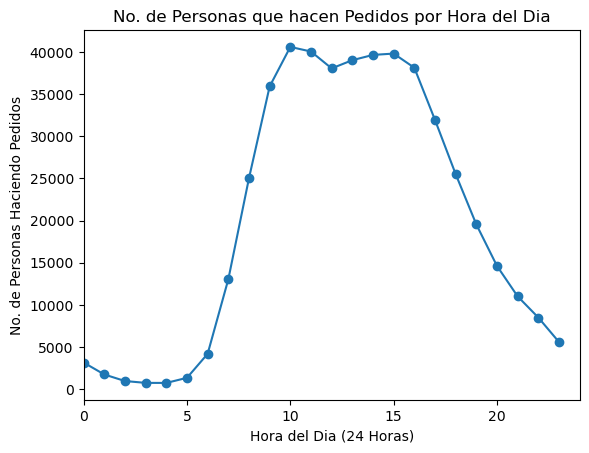

In [31]:
order_number = instacart_orders_df.groupby('order_hour_of_day')['user_id'].count()
order_number.plot(title='No. de Personas que hacen Pedidos por Hora del Dia', 
x = 'order_hour_of_day', y='user_id', 
xlabel='Hora del Dia (24 Horas)', 
ylabel='No. de Personas Haciendo Pedidos', style='o-',
xlim = (0,24))
plt.show()

#### Observaciones
Con esta grafica podemos observar que las horas donde mas pedidos se hacen son entre 10 AM y 4 PM, siendo la hora mas alta las 10 AM. 

### [A3] ¿Qué día de la semana compran víveres las personas?

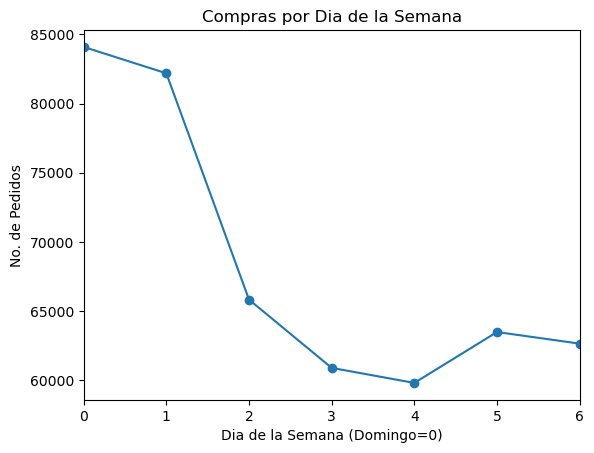

In [32]:
purchase_number = instacart_orders_df.groupby('order_dow')['order_id'].count()
purchase_number.plot(x='order_dow', y='user_id', title='Compras por Dia de la Semana', style='o-', 
xlabel='Dia de la Semana (Domingo=0)', ylabel='No. de Pedidos', xlim=[0,6])
plt.show()

#### Observaciones
Viendo nuestra gráfica, se puede observar que el dia domingo es el dia que más pedidos se hacen en la plataforma. 

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

0.0
30.0



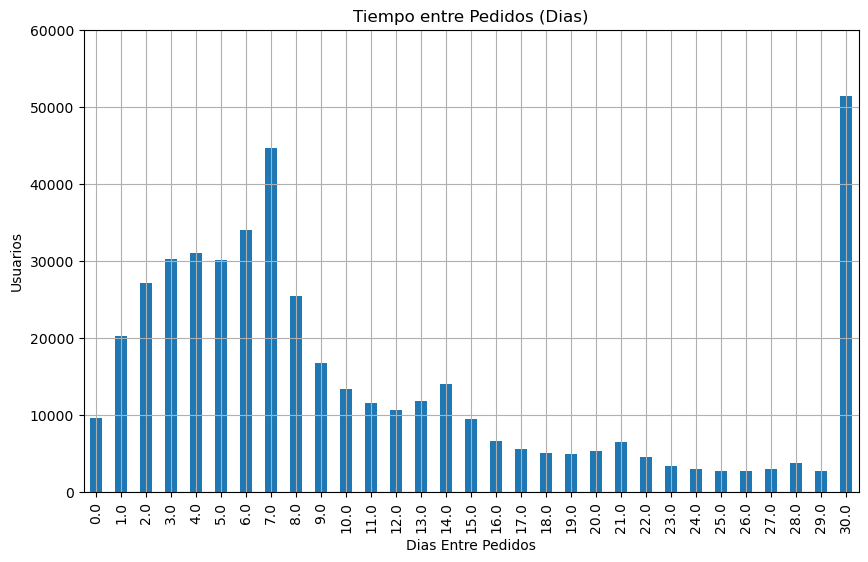

In [33]:
print(instacart_orders_df['days_since_prior_order'].min())
print(instacart_orders_df['days_since_prior_order'].max())
print()
reorder_item = instacart_orders_df.groupby('days_since_prior_order')['user_id'].count()
reorder_item.plot(x='days_since_prior_order', y='user_id', xlabel='Dias Entre Pedidos', ylabel='Usuarios', title='Tiempo entre Pedidos (Dias)', kind='bar', xlim=[0,30], ylim=[0,60000], grid=True, figsize=[10,6])
plt.show()

#### Observaciones

Despues de analizar nuestra gráfica, podemos ver que la mayoría de los usuarios esperan hasta 30 dias antes de hacer otro pedido, mientras que alrededor de 1,000 hacen otro pedido antes de que pasen 24 horas desde su pedido anterior. Parece también haber una concentración entre 5 y 6 dias, lo cual nos indica que hay muchas personas (alrededor de 30,000) que hacen sus pedidos de manera semanal.La frecuencia de compras menos usual es la de 26 dias.  

## [B]

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [34]:
wed_df = instacart_orders_df[instacart_orders_df['order_dow']==3]
sat_df = instacart_orders_df[instacart_orders_df['order_dow']==6]

In [35]:
orders_wed = wed_df['order_hour_of_day'].value_counts()
orders_sat = sat_df['order_hour_of_day'].value_counts()

In [36]:
wed_vs_sat = pd.DataFrame({'Wednesday': orders_wed, 'Saturday': orders_sat})
print(wed_vs_sat)

                   Wednesday  Saturday
order_hour_of_day                     
0                        373       464
1                        215       254
2                        106       177
3                        101       125
4                        108       118
5                        170       161
6                        643       451
7                       1732      1619
8                       3125      3246
9                       4490      4311
10                      5026      4919
11                      5004      5116
12                      4688      5132
13                      4674      5323
14                      4774      5375
15                      5163      5188
16                      4976      5029
17                      4175      4295
18                      3463      3338
19                      2652      2610
20                      1917      1847
21                      1450      1473
22                      1154      1185
23                       

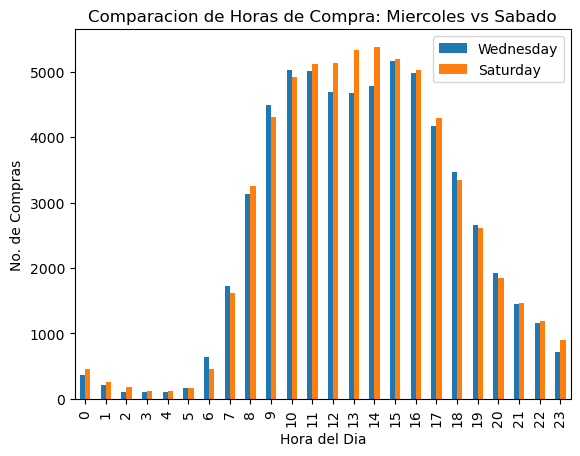

In [37]:
wed_vs_sat.plot(kind='bar', title='Comparacion de Horas de Compra: Miercoles vs Sabado', xlabel='Hora del Dia', ylabel='No. de Compras')
plt.show()

#### Observaciones

Después de analizar nuestra gráfica, podemos observar que por lo general, sí se hacen más compras los sábados que los miércoles en las mismas horas. Si bien, los dos tienen las mismas tedencias de tener más compras a medio dia y menos compras en la madrugada/noche, en cada una de esas horas casi siempre exceden los pedidos en sábado. 

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [38]:
client_orders = instacart_orders_df['user_id'].value_counts()
print(client_orders)

user_id
149605    28
193164    26
78375     25
134511    24
148162    24
          ..
73221      1
112002     1
82546      1
60017      1
133649     1
Name: count, Length: 157437, dtype: int64


count
1     55357
2     36508
3     21547
4     13498
5      8777
6      6012
7      4240
8      3019
9      2152
10     1645
11     1308
12      947
13      703
14      512
15      437
16      263
17      184
18      121
19       85
20       52
22       23
21       22
23       19
24        3
26        1
25        1
28        1
Name: count, dtype: int64


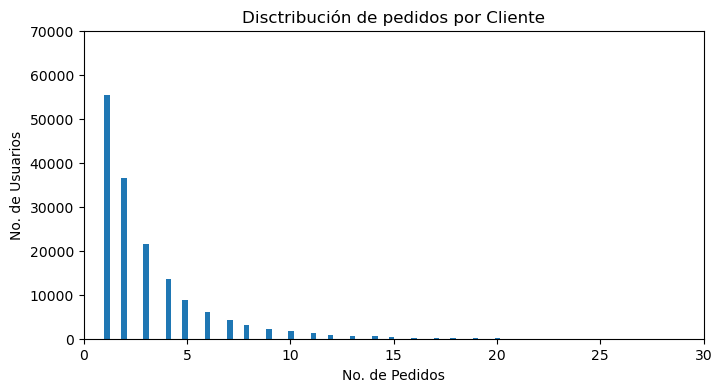

In [39]:
order_distrib = client_orders.value_counts()
print(order_distrib)
client_orders.plot.hist(bins=100, title = 'Disctribución de pedidos por Cliente', xlabel='No. de Pedidos', ylabel='No. de Usuarios', ylim=[0,70000], xlim=[0,30], figsize=[8,4])
plt.show()

Observaciones

La mayoría de los usuarios que han usado la plataforma hacen entre 0 y 5 pedidos. También podemos ver que son menos de 10,000 usuarios los que han hecho mas de 10 pedidos.

La persona que más pedidos ha hecho lleva alrededor de 30 pedidos. 

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [40]:
both_dfs = order_products_df.merge(products_df, on='product_id')
print(both_dfs)
both_dfs_count = both_dfs['product_id'].value_counts()
print(both_dfs_count)
product_name_count = both_dfs['product_name'].value_counts()
best_20 = product_name_count.head(20)
print(best_20)

         order_id  product_id  add_to_cart_order  reordered  \
0         2141543       11440                 17          0   
1          567889        1560                  1          1   
2         2261212       26683                  1          1   
3          491251        8670                 35          1   
4         2571142        1940                  5          1   
...           ...         ...                ...        ...   
4545002    577211       15290                 12          1   
4545003   1219554       21914                  9          0   
4545004    692640       47766                  4          1   
4545005    319435         691                  8          1   
4545006   1398151       28733                  9          0   

                                              product_name  aisle_id  \
0                           CHICKEN BREAST TENDERS BREADED       129   
1                                               BAG OF ICE        37   
2        CAFE LATTE PURE LI

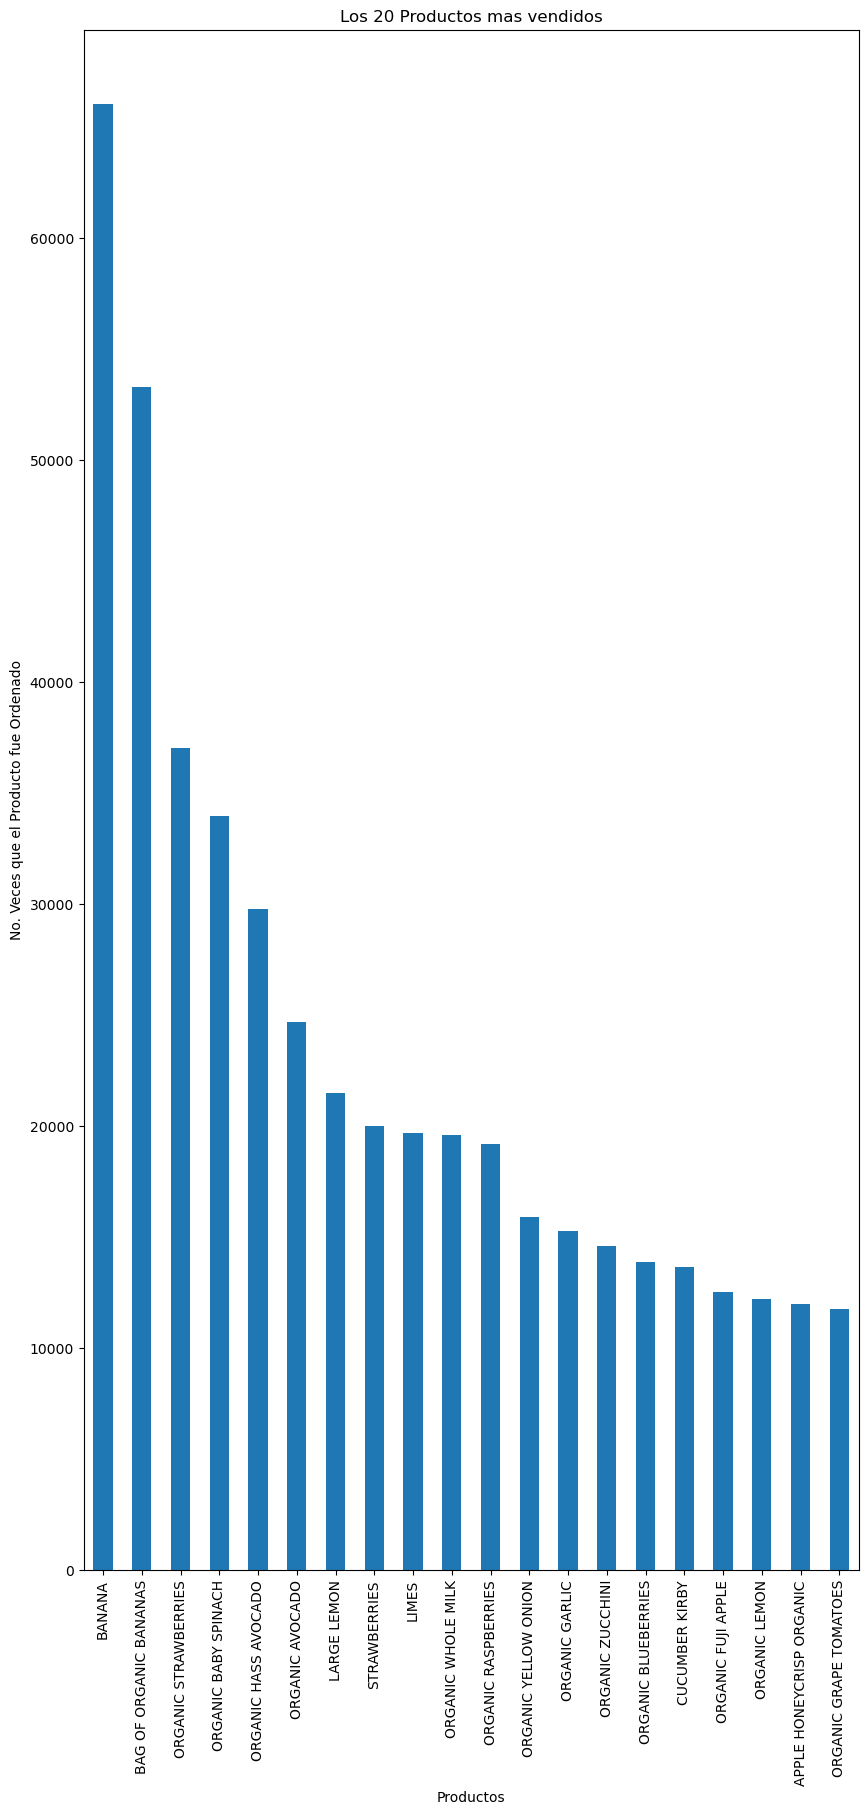

In [41]:
best_20.plot(title = 'Los 20 Productos mas vendidos', xlabel='Productos', rot = 90, ylabel='No. Veces que el Producto fue Ordenado', figsize=[10,20], kind='bar')
plt.show()

#####  Observaciones

El producto más vendido es Banana, estando presente en más de 60,000 pedidos. Esto es el doble que el aguacate orgánico Hass


## [C] 

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [42]:
order_amount = order_products_df.groupby('order_id')['product_id'].count()
print(order_amount)

order_id
4          13
9          15
11          5
19          3
20          8
           ..
3421034    17
3421053     9
3421071     5
3421077     4
3421079     1
Name: product_id, Length: 450046, dtype: int64


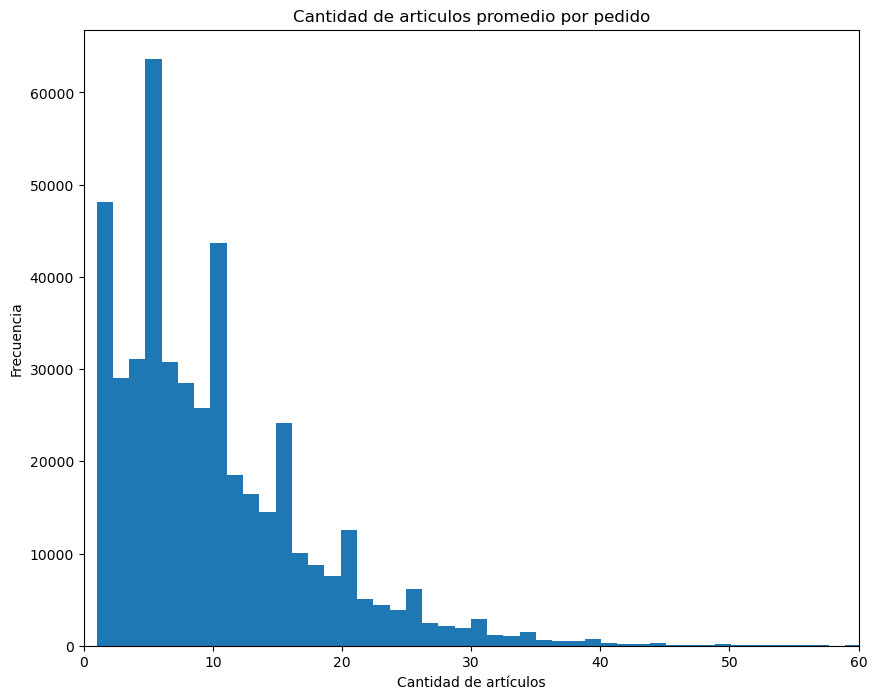

In [43]:
order_amount.plot.hist(bins=100, title='Cantidad de articulos promedio por pedido', xlabel='Cantidad de artículos', rot=0, ylabel='Frecuencia', figsize=[10,8], xlim=[0,60])
plt.show()

##### Observaciones 

La situación más frecuente es que un pedido lleve al rededor de 5 artículos (cerca de 60,000 ocasiones), mientras que menos de 10,000 pedidos se tratan de más de 30 artículos.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [44]:
both_dfs = order_products_df.merge(products_df, on='product_id')

both_dfs_reorder = both_dfs[both_dfs['reordered']==1]

reordered_id_count = both_dfs_reorder.groupby('product_name').count()['reordered']

most_ordered_20 = reordered_id_count.sort_values(ascending=False).head(20).reset_index()
print(most_ordered_20)

                product_name  reordered
0                     BANANA      55763
1     BAG OF ORGANIC BANANAS      44450
2       ORGANIC STRAWBERRIES      28639
3       ORGANIC BABY SPINACH      26233
4       ORGANIC HASS AVOCADO      23629
5            ORGANIC AVOCADO      18743
6         ORGANIC WHOLE MILK      16251
7                LARGE LEMON      15044
8        ORGANIC RASPBERRIES      14748
9               STRAWBERRIES      13945
10                     LIMES      13327
11      ORGANIC YELLOW ONION      11145
12            ORGANIC GARLIC      10411
13          ORGANIC ZUCCHINI      10076
14            CUCUMBER KIRBY       9538
15        ORGANIC FUJI APPLE       8989
16  APPLE HONEYCRISP ORGANIC       8836
17       ORGANIC BLUEBERRIES       8799
18             ORGANIC LEMON       8412
19       ORGANIC HALF & HALF       8389


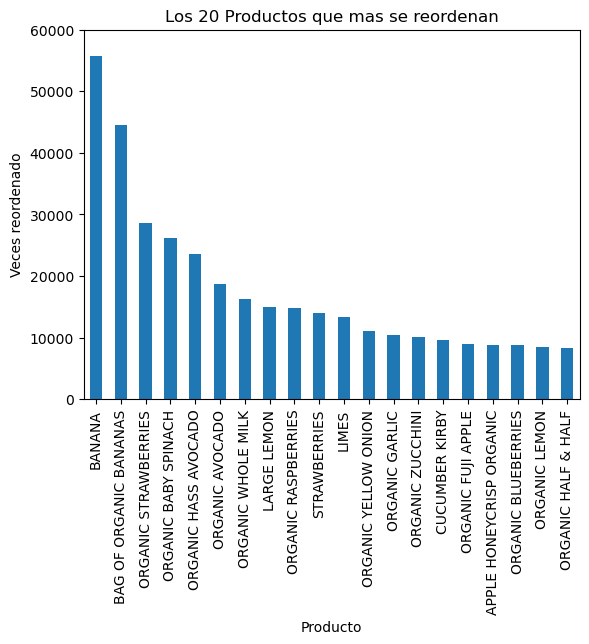

In [45]:
most_ordered_20 = most_ordered_20.set_index('product_name')
most_ordered_20['reordered'].plot(kind='bar', title='Los 20 Productos que mas se reordenan', xlabel='Producto', ylabel='Veces reordenado', ylim=[0,60000], rot=90)
plt.show()

##### Observaciones

Las bananas fueron el producto que más veces se volvió a pedir por los usuarios, y el producto que menos se vuelve a comprar es el half&half orgánico, que apenas representa una sexta parte de los reorders de las bananas.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [46]:
first_order= order_products_df.groupby('product_id')['reordered'].mean()
print(first_order)

product_id
1        0.564286
2        0.000000
3        0.738095
4        0.510204
7        0.500000
           ...   
49690    0.800000
49691    0.430556
49692    0.416667
49693    0.440000
49694    0.333333
Name: reordered, Length: 45573, dtype: float64


##### Observaciones

Para el ejemplo del producto con id "49690", el 80% de las veces que fue comprado, fue por clientes que ya lo habían comprado anteriormente.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [47]:
mixed_dfs = instacart_orders_df.merge(order_products_df, on='order_id')
reordered_products = mixed_dfs.groupby('user_id')['reordered'].mean()
print(reordered_products)

user_id
2         0.038462
4         0.000000
5         0.666667
6         0.000000
7         0.928571
            ...   
206203    0.222222
206206    0.714286
206207    0.891304
206208    0.696000
206209    0.320000
Name: reordered, Length: 149626, dtype: float64


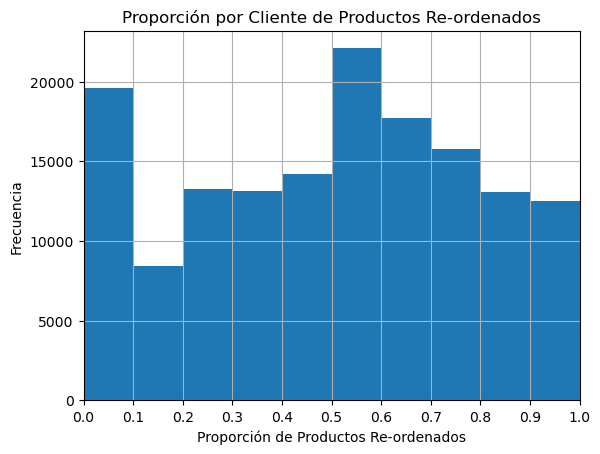

In [60]:
plt.hist(reordered_products, bins= 10)
plt.xlabel('Proporción de Productos Re-ordenados')
plt.ylabel('Frecuencia') 
plt.grid(True)
plt.xlim(0,1.0)
plt.xticks(np.arange(0,1.1,0.1))
plt.title('Proporción por Cliente de Productos Re-ordenados')
plt.show()

##### Observaciones

Se observa que entre los clientes es común que alrededor de un 60% de los artículos en el carrito sean artículos que ya habían comprado antes. Esto demuestra satisfacción con los productos y lealtad por parte de los clientes. 

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [63]:
#combinar DF con los datos que necesito: product_name,add_to_cart_order
merged_dfs = order_products_df.merge(products_df, on='product_id')
#filtrar el nuevo DF para encontrar los add_to_cart_order ==1
first_addition = merged_dfs[merged_dfs['add_to_cart_order']==1]
#agrupar por nombre de producto y contarlos
first_products = first_addition.groupby('product_name').size()
#ordenarlo a top 20 descendiente
first_product_order = first_products.sort_values(ascending=False).reset_index(name='count').head(20)
print(first_product_order)

                   product_name  count
0                        BANANA  15562
1        BAG OF ORGANIC BANANAS  11026
2            ORGANIC WHOLE MILK   4363
3          ORGANIC STRAWBERRIES   3946
4          ORGANIC HASS AVOCADO   3390
5          ORGANIC BABY SPINACH   3336
6               ORGANIC AVOCADO   3044
7                  SPRING WATER   2336
8                  STRAWBERRIES   2308
9           ORGANIC RASPBERRIES   2024
10   SPARKLING WATER GRAPEFRUIT   1914
11          ORGANIC HALF & HALF   1797
12                  LARGE LEMON   1737
13                         SODA   1733
14     ORGANIC REDUCED FAT MILK   1397
15                        LIMES   1370
16                HASS AVOCADOS   1340
17  ORGANIC REDUCED FAT 2% MILK   1310
18                  HALF & HALF   1309
19                  RASPBERRIES   1246


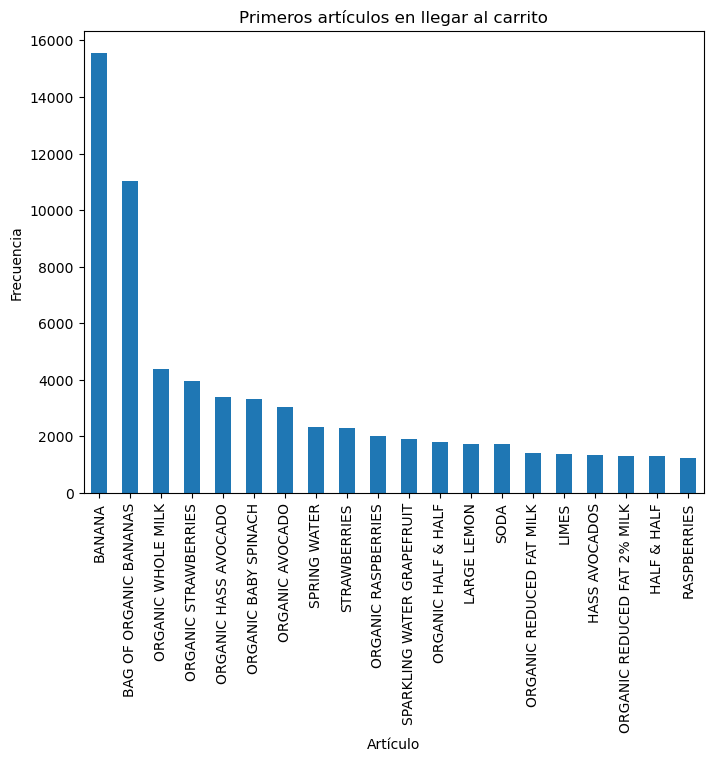

In [71]:
first_product_order.set_index('product_name')['count'].plot(
    kind='bar', title='Primeros artículos en llegar al carrito', 
    xlabel='Artículo', ylabel='Frecuencia', rot=90, figsize=(8,6))
plt.show()

Cuatro de los primeros 5 artículos que más frecuentemente se agregan al carrito primero, son frutas y verduras. Esto nos indica que la mayoría de los clientes empieza el recorrido de la tienda por esta sección. 
La diferencia entre las bananas (orgánicas y no orgánicas) y el resto de los artículos es bastante alta, lo cual podría usarse en beneficio de la tienda. 

# Conclusion general del proyecto:

#####  Una vez analizada toda nuestra data, podemos ver algunos puntos importantes, como:
 - La gran mayoria de nuestros clientes harán sus compras los lunes entre 10 am y 3 pm
 - La mayoría de los usuarios dejan pasar 30 días antes de hacer un nuevo pedido.
 - Los sábados hay más usuarios dentro de la aplicación que los miércoles.
 -  Dentro de nuestra muestra, la gran mayoría de los usuarios han hecho entre 1-2 pedidos
 -  El artículo que más se vende, más se vuelve a ordenar y más seguido es el primero en ser agregado al carrito, es la Banana
 -  Muy pocos usuarios llevan más de 30 artículos en sus carritos.

Con esta información podemos hacer varias conclusiones y decisiones para optimizar nuestras ventas!
